<a href="https://colab.research.google.com/github/subrahmanyeswarareddy21/Advance-Traffic-Navigation-System/blob/main/Reinforcement%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt-get install x11-utils > /dev/null 2>&1
!pip install pyglet > /dev/null 2>&1
!apt-get install -y xvfb python-openg1 > /dev/null 2>&1

In [2]:
import gym

In [58]:
env = gym.make("Taxi-v3").env

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [13]:
env.reset()

12

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay

In [15]:
!pip install gym pyvirtualdisplay > /dev/null 2>&1

In [16]:
from pyvirtualdisplay import Display

In [17]:
!python -m pip install pygame

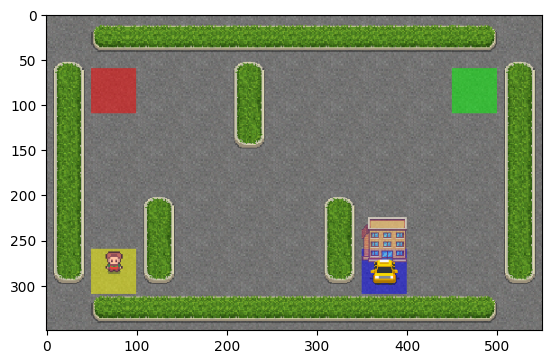

In [37]:
env.reset()
prev_screen = env.render(mode='rgb_array')
plt.imshow(prev_screen)

for i in range(40):
  action = env.action_space.sample()
  obs, reward, done, info = env.step(action)
  screen = env.render(mode='rgb_array')

  plt.imshow(screen)
  ipythondisplay.clear_output(wait=True)
  ipythondisplay.display(plt.gcf())

  if done:
    break

  ipythondisplay.clear_output(wait=True)
  env.close()

In [56]:
print("Action space {}".format(env.action_space))
print("State space {}".format(env.observation_space))
state = env.encode(3, 1, 2, 0)
print("State:", state)
env.s = state

Action space Discrete(6)
State space Discrete(500)
State: 328


In [20]:
env.P[328]

{0: [(1.0, 428, -1, False)],
 1: [(1.0, 228, -1, False)],
 2: [(1.0, 348, -1, False)],
 3: [(1.0, 328, -1, False)],
 4: [(1.0, 328, -10, False)],
 5: [(1.0, 328, -10, False)]}

In [39]:
env.s = 328
epochs = 0
penalties,rewards = 0, 0
frames = []
done = False

while not done:
  action = env.action_space.sample()
  state, reward, done, info = env.step(action)

  if reward == -10:
    penalties += 1

  frames.append({
      'frame': env.render(mode='ansi'),
      'state': state,
      'action': action,
      'reward': reward
  })

  epochs += 1

print("Timesteps taken: {}".format(epochs))
print("Penalties incurred: {}".format(penalties))

Timesteps taken: 5675
Penalties incurred: 1867


In [45]:
from IPython.display import clear_output
from time import sleep

def print_frames(frames):
  for i, frame in enumerate(frames):
    clear_output(wait=True)
    print(frame['frame'])
    print(f"Timestep: {i + 1}")
    print(f"State: {frame['state']}")
    print(f"Action: {frame['action']}")
    print(f"Reward: {frame['reward']}")
    sleep(.1)
  print_frames(frames)

In [46]:
import numpy as np
q_table = np.zeros([env.observation_space.n, env.action_space.n])

In [49]:
%%time
import random
from IPython.display import clear_output

alpha = 0.1
gamma = 0.6
epsilon = 0.1

all_epochs = []
all_penalties = []

for i in range(1, 100001):
   state = env.reset()

   epochs, penalties, reward = 0, 1, 0

   done = False
   while not done:

        if random.uniform(0, 1) < epsilon:
           action = env.action_space.sample()
        else:
           action = np.argmax(q_table[state])

        next_state, reward, done, info = env.step(action)
        old_value = q_table[state, action]
        next_max = np.max(q_table[next_state])
        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        q_table[state, action] = new_value
        if reward == -10:
         penalties += 1

        state = next_state
        epochs += 1

if i % 100 == 0:
       clear_output(wait=True)
       print(f"Episode: {i}")

print("Training finished.\n")

Episode: 100000
Training finished.

CPU times: user 1min 5s, sys: 6.13 s, total: 1min 11s
Wall time: 1min 7s


In [50]:
q_table[328]

array([ -2.41485065,  -2.27325184,  -2.40738013,  -2.35788406,
       -11.00142056,  -9.77955524])

In [51]:
total_epochs, total_penalties = 1, 1
episodes = 100

for _ in range(episodes):
  state = env.reset()
  epochs, penalties, reward = 0, 1, 0

  done = False

  while not done:
    action = np.argmax(q_table[state])
    state, reward, done, info = env.step(action)

    if reward == -10:
      penalties += 1

    epochs += 1

  total_penalties += penalties
  total_epochs += epochs

print(f"Results after {episodes} episodes:")
print(f"Average timesteps per episode: {total_epochs / episodes}")
print(f"Average penalties per episode: {total_penalties / episodes}")

Results after 100 episodes:
Average timesteps per episode: 13.15
Average penalties per episode: 1.01


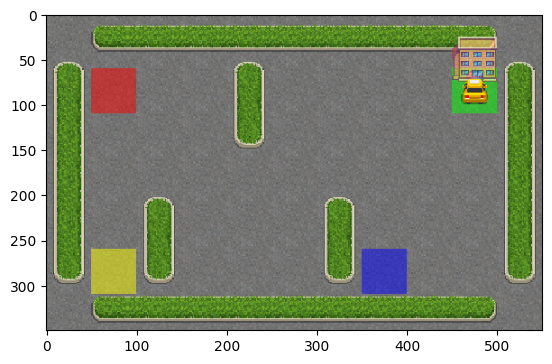

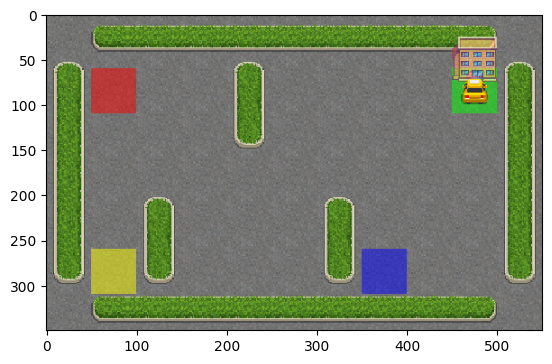

In [54]:
env.reset()
prev_screen = env.render(mode='rgb_array')
plt.imshow(prev_screen)

for i in range(50):
  action = np.argmax(q_table[state])
  state, penalty, done, info = env.step(action)
  screen = env.render(mode='rgb_array')

  plt.imshow(screen)
  ipythondisplay.clear_output(wait=True)
  ipythondisplay.display(plt.gcf())

  if done:
    break

  ipythondisplay.clear_output(wait=True)
  env.close()